# IBM Applied Data Science Capstone Project #

This notebook is used for applied data science project used for IBM Data Science Professional Certification

## Introduction ##

In this project, our aim to predict the severity of traffic accidents .
The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.In most cases not paying enough attention or driving at high speeds are the main causes of accidents that can be prevented by using harsher regulations.
 weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.

The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.


## Data ##

The data set we will be using is data collision.
Dependent variable/ target: “SEVERITYCODE” (0 to 4 levels)

0 - Little to no Probability (Clear Weather Conditions) 1 - Very Low Probability - Chance or Property Damage 2 - Low Probability - Chance of Injury 3 - Mild Probability - Chance of Serious Injury 4 - High Probability - Chance of Fatality

The data also provides detail of the crash, including the type of collision, the parties involved and the number of people killed and injured. The circumstance around the collision is recorded in terms of the road condition, the weather, light condition, whether drugs or alcohol or speeding was involved

Given this data set, the most straightforward model is to used the circumstances around the collisions as attributes to predict the severity of the collision, disregarding the parties involved and the type of collision in the first attempt of the model for simplicity. Supervised learning will be used to obtain this model as the data is labeled.


In [4]:
#import all required libries ( for both SVM and  Decision tree Classification methods)
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
#import pydotplus
import matplotlib.image as mpimage
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score,jaccard_similarity_score
import seaborn as sns
%matplotlib inline
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()
df.shape



(194673, 38)

In [5]:
df_main = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df_main.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [6]:
print('NaN_Weather data:', df_main['WEATHER'].isnull().sum())
print('NaN_Roadcondition data:', df_main['ROADCOND'].isnull().sum())
print('NaN_Light condition data:', df_main['LIGHTCOND'].isnull().sum())

NaN_Weather data: 5081
NaN_Roadcondition data: 5012
NaN_Light condition data: 5170


In [7]:
df_main = df_main.dropna()

In [8]:
df_main.shape

(189337, 4)

To get insight and influence of road on collision incidents plot collisions vs road condition data 

In [12]:
from pandasql import sqldf
dfroadcon= df_main[['ROADCOND','SEVERITYCODE']]
output_roadcon1= sqldf("select ROADCOND , count(SEVERITYCODE) from dfroadcon where SEVERITYCODE = 2  group by ROADCOND ")
output_roadcon2= sqldf("select ROADCOND , count(SEVERITYCODE) from dfroadcon  group by ROADCOND ")
output_roadcon1

,ROADCOND,count(SEVERITYCODE)
0,Dry,40004
1,Ice,273
2,Oil,24
3,Other,43
4,Sand/Mud/Dirt,23
5,Snow/Slush,166
6,Standing Water,30
7,Unknown,747
8,Wet,15742


In [11]:
!pip install -U pandasql

  Stored in directory: /home/dsxuser/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


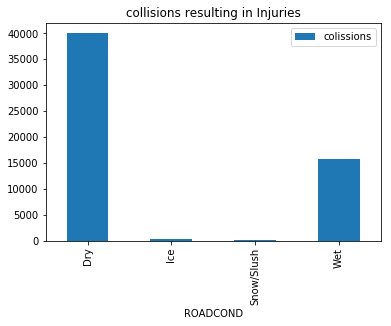

In [14]:
output_roadcon1.set_index(output_roadcon1['ROADCOND'],inplace=True)
output_roadcon1 = output_roadcon1[pd.notnull(output_roadcon1["ROADCOND"])]
output_roadcon1.drop(columns={'ROADCOND'}, inplace=True)
output_roadcon1.drop(['Oil', 'Other','Unknown','Standing Water','Sand/Mud/Dirt'],inplace=True)
output_roadcon1.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_roadcon1.plot.bar(y='colissions', title='collisions resulting in Injuries',rot=90)

In [15]:
output_roadcon2.set_index(output_roadcon2['ROADCOND'],inplace=True)
output_roadcon2 = output_roadcon2[pd.notnull(output_roadcon2["ROADCOND"])]
output_roadcon2.drop(columns={'ROADCOND'}, inplace=True)
output_roadcon2.drop(['Oil', 'Other','Unknown','Standing Water','Sand/Mud/Dirt'],inplace=True)
output_roadcon2.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)

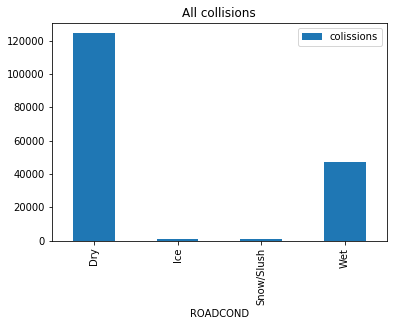

In [16]:
ax = output_roadcon2.plot.bar(y='colissions', title='All collisions',rot=90)

In [17]:
dfwether= df_main[['WEATHER','SEVERITYCODE']]
output_weather1= sqldf("select WEATHER , count(SEVERITYCODE) from dfwether where SEVERITYCODE = 2  group by WEATHER ")
output_weather2= sqldf("select WEATHER , count(SEVERITYCODE) from dfwether  group by WEATHER ")
output_weather1.set_index(output_weather1['WEATHER'],inplace=True)
output_weather1 = output_weather1[pd.notnull(output_weather1["WEATHER"])]
output_weather1.drop(columns={'WEATHER'}, inplace=True)
output_weather1

,count(SEVERITYCODE)
WEATHER,
Blowing Sand/Dirt,15
Clear,35808
Fog/Smog/Smoke,187
Other,116
Overcast,8739
Partly Cloudy,3
Raining,11168
Severe Crosswind,7
Sleet/Hail/Freezing Rain,28


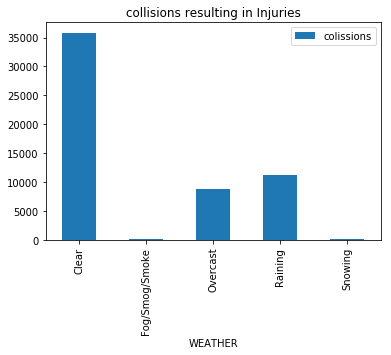

In [18]:
output_weather1.drop(['Blowing Sand/Dirt','Partly Cloudy', 'Other','Unknown','Sleet/Hail/Freezing Rain','Severe Crosswind'],inplace=True)
output_weather1.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_weather1.plot.bar(y='colissions', title='collisions resulting in Injuries',rot=90)

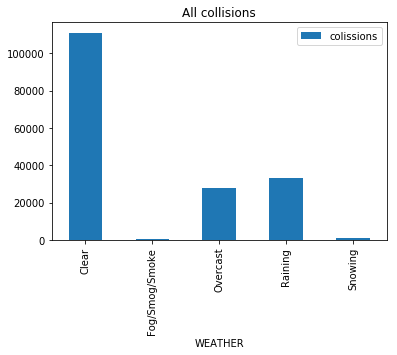

In [19]:
output_weather2.set_index(output_weather2['WEATHER'],inplace=True)
output_weather2 = output_weather2[pd.notnull(output_weather2["WEATHER"])]
output_weather2.drop(columns={'WEATHER'}, inplace=True)
output_weather2.drop(['Blowing Sand/Dirt','Partly Cloudy', 'Other','Unknown','Sleet/Hail/Freezing Rain','Severe Crosswind'],inplace=True)
output_weather2.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_weather2.plot.bar(y='colissions', title='All collisions',rot=90)

In [20]:
dflighting= df_main[['LIGHTCOND','SEVERITYCODE']]
output_lighting1= sqldf("select LIGHTCOND , count(SEVERITYCODE) from dflighting where SEVERITYCODE = 2  group by LIGHTCOND ")
output_lighting2= sqldf("select LIGHTCOND , count(SEVERITYCODE) from dflighting  group by LIGHTCOND ")
output_lighting1.set_index(output_lighting1['LIGHTCOND'],inplace=True)
output_lighting1 = output_lighting1[pd.notnull(output_lighting1["LIGHTCOND"])]
output_lighting1.drop(columns={'LIGHTCOND'}, inplace=True)
output_lighting1

,count(SEVERITYCODE)
LIGHTCOND,
Dark - No Street Lights,334
Dark - Street Lights Off,316
Dark - Street Lights On,14451
Dark - Unknown Lighting,4
Dawn,824
Daylight,38528
Dusk,1938
Other,52
Unknown,605


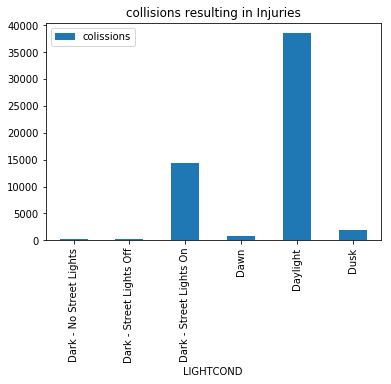

In [21]:
output_lighting1.drop(['Dark - Unknown Lighting','Other','Unknown'],inplace=True)
output_lighting1.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_lighting1.plot.bar(y='colissions', title='collisions resulting in Injuries',rot=90)

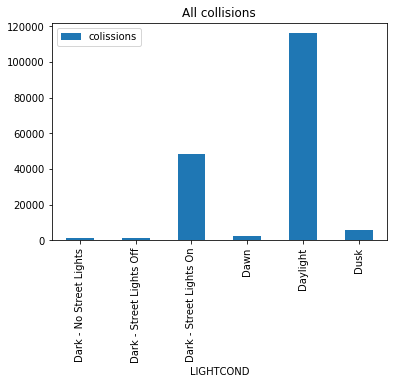

In [22]:
output_lighting2.set_index(output_lighting2['LIGHTCOND'],inplace=True)
output_lighting2 = output_lighting2[pd.notnull(output_lighting2["LIGHTCOND"])]
output_lighting2.drop(columns={'LIGHTCOND'}, inplace=True)
output_lighting2.drop(['Dark - Unknown Lighting','Other','Unknown'],inplace=True)
output_lighting2.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_lighting2.plot.bar(y='colissions', title='All collisions',rot=90)

In [23]:
df['ST_COLDESC'].value_counts()


One parked--one moving                                                                   44421
Entering at angle                                                                        34674
From same direction - both going straight - one stopped - rear-end                       25771
Fixed object                                                                             13554
From same direction - both going straight - both moving - sideswipe                      12777
From opposite direction - one left turn - one straight                                   10324
From same direction - both going straight - both moving - rear-end                        7629
Vehicle - Pedalcyclist                                                                    4701
From same direction - all others                                                          4537
From same direction - one left turn - one straight                                        3093
From same direction - one right turn - one straigh

In [24]:
count = df_main.shape[0]
i=0;
for i in range(count):
    if df_main.at[i ,'SEVERITYCODE'] ==2:
        df_main.at[i,'SEVERITYCODE'] = 1
    elif df_main.at[i ,'SEVERITYCODE'] ==1:
        df_main.at[i,'SEVERITYCODE'] = 0
    else:
        print ('error')

KeyError: 15

In [25]:
df_main.head(10)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,1,Overcast,Wet,Daylight
1,0,Raining,Wet,Dark - Street Lights On
2,0,Overcast,Dry,Daylight
3,0,Clear,Dry,Daylight
4,1,Raining,Wet,Daylight
5,0,Clear,Dry,Daylight
6,0,Raining,Wet,Daylight
7,1,Clear,Dry,Daylight
8,0,Clear,Dry,Daylight
9,1,Clear,Dry,Daylight


In [26]:
df_main = pd.get_dummies(df_main, columns=["WEATHER"])
df_main.drop(["WEATHER_Other","WEATHER_Blowing Sand/Dirt","WEATHER_Partly Cloudy","WEATHER_Severe Crosswind","WEATHER_Unknown","WEATHER_Sleet/Hail/Freezing Rain"],axis=1, inplace = True)
df_main.rename(columns={'WEATHER_Clear': 'Clearsky', 'WEATHER_Overcast': 'Overcast','WEATHER_Raining':'Raining','WEATHER_Snowing':'Snowing','WEATHER_Fog/Smog/Smoke':'Foggy'}, inplace = True)
df_main.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,Clearsky,Foggy,Overcast,Raining,Snowing
0,1,Wet,Daylight,0,0,1,0,0
1,0,Wet,Dark - Street Lights On,0,0,0,1,0
2,0,Dry,Daylight,0,0,1,0,0
3,0,Dry,Daylight,1,0,0,0,0
4,1,Wet,Daylight,0,0,0,1,0


In [27]:
print('Lighting conditions:', df_main['LIGHTCOND'].value_counts())
df_main = pd.get_dummies(df_main, columns=["LIGHTCOND"])
df_main.drop(["LIGHTCOND_Other","LIGHTCOND_Unknown","LIGHTCOND_Dark - Unknown Lighting"],axis=1, inplace = True)
df_main.rename(columns={'LIGHTCOND_Daylight': 'Daylight', 'LIGHTCOND_Dusk': 'Dusk','LIGHTCOND_Dark - Street Lights On':'Dark & Street Lighton','LIGHTCOND_Dawn': 'Dawn'}, inplace = True)
df_main['Dark-nolights'] = df_main[ "LIGHTCOND_Dark - Street Lights Off"] + df_main["LIGHTCOND_Dark - No Street Lights"]
df_main.drop(["LIGHTCOND_Dark - Street Lights Off","LIGHTCOND_Dark - No Street Lights"],axis=1, inplace = True)
df_main.head()

Lighting conditions: Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


,SEVERITYCODE,ROADCOND,Clearsky,Foggy,Overcast,Raining,Snowing,Dark & Street Lighton,Dawn,Daylight,Dusk,Dark-nolights
0,1,Wet,0,0,1,0,0,0,0,1,0,0
1,0,Wet,0,0,0,1,0,1,0,0,0,0
2,0,Dry,0,0,1,0,0,0,0,1,0,0
3,0,Dry,1,0,0,0,0,0,0,1,0,0
4,1,Wet,0,0,0,1,0,0,0,1,0,0


In [28]:
df_main['ROADCOND'].value_counts()
df_main = pd.get_dummies(df_main, columns=["ROADCOND"])
df_main.drop(["ROADCOND_Other","ROADCOND_Unknown","ROADCOND_Standing Water","ROADCOND_Oil","ROADCOND_Sand/Mud/Dirt"],axis=1, inplace = True)
df_main.rename(columns={'ROADCOND_Dry': 'Dry Road', 'ROADCOND_Ice': 'Icy Road', 'ROADCOND_Wet': 'Wet Road','ROADCOND_Snow/Slush': 'Slushy Road'}, inplace =True)
df_main.head()


,SEVERITYCODE,Clearsky,Foggy,Overcast,Raining,Snowing,Dark & Street Lighton,Dawn,Daylight,Dusk,Dark-nolights,Dry Road,Icy Road,Slushy Road,Wet Road
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [29]:
df_main.columns

Index(['SEVERITYCODE', 'Clearsky', 'Foggy', 'Overcast', 'Raining', 'Snowing',
       'Dark & Street Lighton', 'Dawn', 'Daylight', 'Dusk', 'Dark-nolights',
       'Dry Road', 'Icy Road', 'Slushy Road', 'Wet Road'],
      dtype='object')

In [30]:
X = np.asarray(df_main[['Clearsky','Foggy','Overcast','Raining','Snowing','Dark & Street Lighton','Dawn','Daylight','Dusk','Dark-nolights','Dry Road','Icy Road','Slushy Road','Wet Road']])
y=np.asarray(df_main[['SEVERITYCODE']])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132535, 14) (132535, 1)
Test set: (56802, 14) (56802, 1)


In [45]:
Dtree =DecisionTreeClassifier(criterion="entropy", max_depth =6)
Dtree.fit(X_train,y_train)
yhattree = Dtree.predict(X_test)

In [38]:
jaccard_similarity_score(y_test,yhattree)

0.6984789267983522

In [39]:
f1_score(y_test,yhattree, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5744820303434938

In [40]:
df['DATE'] = pd.to_datetime(df['INCDATE']).dt.date
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
dfyears= df[['YEAR','SEVERITYCODE']]

In [41]:
output_years= sqldf("select YEAR, count(SEVERITYCODE) from dfyears group by YEAR ")


In [42]:
output_years.set_index(output_years['YEAR'],inplace=True)

In [43]:
output_years.drop(columns={'YEAR'}, inplace=True)
output_years.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)

output_years

,colissions
YEAR,
2004,11865
2005,15115
2006,15188
2007,14456
2008,13660
2009,11734
2010,10808
2011,10919
2012,10907


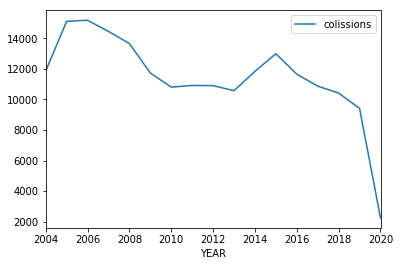

In [44]:
output_years.plot.line()